In [9]:
#run this cell to upload files from local machine, ran 3 times to upload sender_data.csv, recipient_data.csv, and models.py
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving models.py to models.py
User uploaded file "models.py" with length 13802 bytes


Run the two following cells to install pytorch on the VM

In [5]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl

    100% |████████████████████████████████| 592.3MB 55.0MB/s 


In [6]:
!pip3 install torchvision

    100% |████████████████████████████████| 61kB 2.2MB/s 
    100% |████████████████████████████████| 2.0MB 5.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [32]:
#  Check for requisite files sender_data.csv, recipient_data.csv, and models.py
!ls

datalab  models.py  nltk_data  __pycache__  recipient_data.csv	sender_data.csv


In [10]:
import torch
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from models import *


[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
sender_df = preprocess("sender_data.csv")
recipient_df = preprocess("recipient_data.csv")

In [0]:
sender_splits = get_splits(sender_df)
recipient_splits = get_splits(recipient_df)

# Senders

In [0]:
vectorizer = CountVectorizer().fit(sender_df.content)
vocab_size = len(vectorizer.vocabulary_)
window_size = 8
n_filters = 8
num_labels = 2
learning_rate = 0.01 
num_train_steps = 200
batch_size = 32

In [0]:
training_set, dev_set, test_set = split_dataframe(sender_df, sender_splits)
training_iter = data_iter(training_set, batch_size)
dev_iter = eval_iter(dev_set, batch_size)
test_iter = eval_iter(test_set, batch_size)

In [45]:
%time model = CNN_trainer(training_iter, num_train_steps, vocab_size, window_size, n_filters, learning_rate, num_labels)

CPU times: user 2min 9s, sys: 364 ms, total: 2min 10s
Wall time: 2min 10s


In [46]:
%time evaluate(model, dev_iter)

CPU times: user 31.9 s, sys: 4.77 s, total: 36.6 s
Wall time: 36.7 s


0.6395348837209303

DO NOT RUN THE FOLLOWING CELLS WITHOUT CUDA(GPU) ENABLED

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
learning_rates = 10.0**np.arange(-7,5)
window_sizes = np.arange(2, 21, 2)
n_filterss = 2**np.arange(0,11)

CPU times: user 2min 9s, sys: 360 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 8s, sys: 354 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 6s, sys: 372 ms, total: 2min 6s
Wall time: 2min 6s
CPU times: user 2min 9s, sys: 362 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 9s, sys: 370 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 9s, sys: 362 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 9s, sys: 348 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 6s, sys: 325 ms, total: 2min 7s
Wall time: 2min 7s
CPU times: user 2min 7s, sys: 348 ms, total: 2min 7s
Wall time: 2min 8s
CPU times: user 2min 9s, sys: 321 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 8s, sys: 320 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 9s, sys: 368 ms, total: 2min 9s
Wall time: 2min 9s


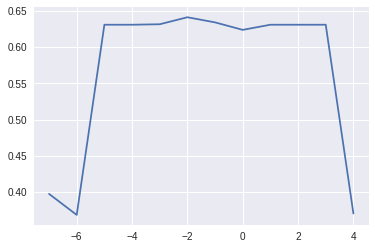

In [49]:
accs = []
for param in learning_rates:
  %time model = CNN_trainer(training_iter, num_train_steps, vocab_size, window_size, n_filters, param, num_labels)
  accs.append(evaluate(model, dev_iter))

plt.plot(np.arange(-7,5), accs)

In [50]:
best_lr  =  learning_rates[np.argmax(np.array(accs))]
best_lr

0.01

CPU times: user 2min 9s, sys: 360 ms, total: 2min 9s
Wall time: 2min 10s
CPU times: user 2min 9s, sys: 355 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 8s, sys: 353 ms, total: 2min 8s
Wall time: 2min 8s
CPU times: user 2min 7s, sys: 352 ms, total: 2min 8s
Wall time: 2min 8s
CPU times: user 2min 7s, sys: 357 ms, total: 2min 8s
Wall time: 2min 8s
CPU times: user 2min 8s, sys: 349 ms, total: 2min 8s
Wall time: 2min 8s
CPU times: user 2min 7s, sys: 340 ms, total: 2min 7s
Wall time: 2min 7s
CPU times: user 2min 7s, sys: 422 ms, total: 2min 7s
Wall time: 2min 8s
CPU times: user 2min 7s, sys: 347 ms, total: 2min 7s
Wall time: 2min 8s
CPU times: user 2min 8s, sys: 343 ms, total: 2min 9s
Wall time: 2min 9s


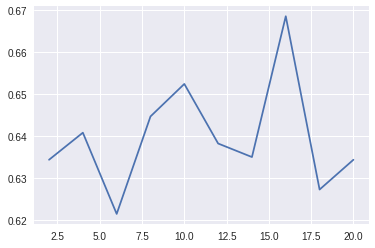

In [51]:
accs = []
for param in window_sizes:
  %time model = CNN_trainer(training_iter, num_train_steps, vocab_size, int(param), n_filters, learning_rate, num_labels)
  accs.append(evaluate(model, dev_iter))

plt.plot(window_sizes, accs)

In [52]:
best_window_size = window_sizes[np.argmax(np.array(accs))]
best_window_size

16

CPU times: user 2min 9s, sys: 341 ms, total: 2min 9s
Wall time: 2min 10s
CPU times: user 2min 9s, sys: 343 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 11s, sys: 333 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 10s, sys: 352 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 9s, sys: 319 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 11s, sys: 355 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 9s, sys: 368 ms, total: 2min 9s
Wall time: 2min 10s
CPU times: user 2min 10s, sys: 357 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 13s, sys: 2.87 s, total: 2min 16s
Wall time: 2min 16s
CPU times: user 2min 40s, sys: 1min 25s, total: 4min 6s
Wall time: 4min 6s
CPU times: user 3min 42s, sys: 4min 25s, total: 8min 7s
Wall time: 8min 8s


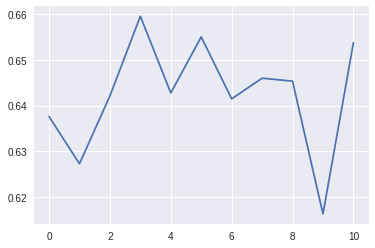

In [41]:
accs = []
for param in n_filterss:
  %time model = CNN_trainer(training_iter, num_train_steps, vocab_size, window_size, int(param), learning_rate, num_labels)
  accs.append(evaluate(model, dev_iter))

plt.plot(np.arange(0,11), accs)

In [42]:
best_n_filters = n_filterss[np.argmax(np.array(accs))]
best_n_filters

8

In [54]:
model =  CNN_trainer(training_iter,
                     num_train_steps,
                     vocab_size,
                     window_size=16,
                     n_filters=8,
                     lr=0.01,
                     num_labels=num_labels)
evaluate(model, test_iter), evaluate(model, dev_iter)

(0.6551501453019051, 0.650516795865633)

# Recipients

In [0]:
vectorizer = CountVectorizer().fit(recipient_df.content)
vocab_size = len(vectorizer.vocabulary_)
window_size = 8
n_filters = 8
num_labels = 2
learning_rate = 0.01 
num_train_steps = 200
batch_size = 32

In [0]:
training_set, dev_set, test_set = split_dataframe(recipient_df, recipient_splits)
training_iter = data_iter(training_set, batch_size)
dev_iter = eval_iter(dev_set, batch_size)
test_iter = eval_iter(test_set, batch_size)

In [57]:
%time model = CNN_trainer(training_iter, num_train_steps, vocab_size, window_size, n_filters, learning_rate, num_labels)
%time evaluate(model, dev_iter)

CPU times: user 2min 12s, sys: 371 ms, total: 2min 12s
Wall time: 2min 13s
CPU times: user 37.5 s, sys: 5.1 s, total: 42.6 s
Wall time: 42.7 s


0.5203488372093024

In [0]:
learning_rates = 10.0**np.arange(-7,5)
window_sizes = np.arange(2, 21, 2)
n_filterss = 2**np.arange(0,11)

CPU times: user 2min 13s, sys: 371 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 12s, sys: 386 ms, total: 2min 12s
Wall time: 2min 12s
CPU times: user 2min 12s, sys: 377 ms, total: 2min 12s
Wall time: 2min 12s
CPU times: user 2min 11s, sys: 356 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 13s, sys: 371 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 12s, sys: 357 ms, total: 2min 12s
Wall time: 2min 13s
CPU times: user 2min 13s, sys: 347 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 13s, sys: 434 ms, total: 2min 13s
Wall time: 2min 14s
CPU times: user 2min 13s, sys: 332 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 12s, sys: 358 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 2min 11s, sys: 343 ms, total: 2min 12s
Wall time: 2min 12s
CPU times: user 2min 12s, sys: 347 ms, total: 2min 12s
Wall time: 2min 13s
10.0


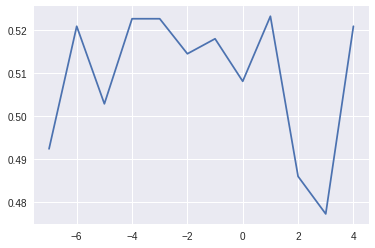

In [59]:
accs = []
for param in learning_rates:
  %time model = CNN_trainer(training_iter, num_train_steps, vocab_size, window_size, n_filters, param, num_labels)
  accs.append(evaluate(model, dev_iter))

plt.plot(np.arange(-7,5), accs)
best_lr  =  learning_rates[np.argmax(np.array(accs))]
print(best_lr)

CPU times: user 2min 8s, sys: 347 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 11s, sys: 358 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 8s, sys: 335 ms, total: 2min 8s
Wall time: 2min 9s
CPU times: user 2min 9s, sys: 348 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 10s, sys: 332 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 8s, sys: 334 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 11s, sys: 322 ms, total: 2min 11s
Wall time: 2min 11s
CPU times: user 2min 8s, sys: 323 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 8s, sys: 338 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 8s, sys: 334 ms, total: 2min 8s
Wall time: 2min 9s
14


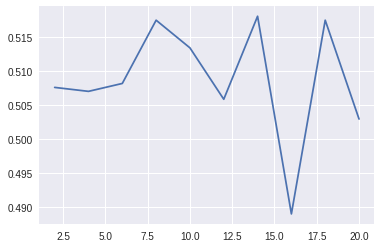

In [60]:
accs = []
for param in window_sizes:
  %time model = CNN_trainer(training_iter, num_train_steps, vocab_size, int(param), n_filters, learning_rate, num_labels)
  accs.append(evaluate(model, dev_iter))

plt.plot(window_sizes, accs)
best_window_size = window_sizes[np.argmax(np.array(accs))]
print(best_window_size)

CPU times: user 2min 8s, sys: 330 ms, total: 2min 8s
Wall time: 2min 8s
CPU times: user 2min 8s, sys: 351 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 12s, sys: 311 ms, total: 2min 12s
Wall time: 2min 12s
CPU times: user 2min 8s, sys: 299 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 10s, sys: 348 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 9s, sys: 341 ms, total: 2min 10s
Wall time: 2min 10s
CPU times: user 2min 9s, sys: 345 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 9s, sys: 306 ms, total: 2min 9s
Wall time: 2min 9s
CPU times: user 2min 10s, sys: 2.43 s, total: 2min 12s
Wall time: 2min 12s
CPU times: user 2min 38s, sys: 1min 21s, total: 3min 59s
Wall time: 3min 59s
CPU times: user 3min 38s, sys: 4min 14s, total: 7min 53s
Wall time: 7min 53s
2


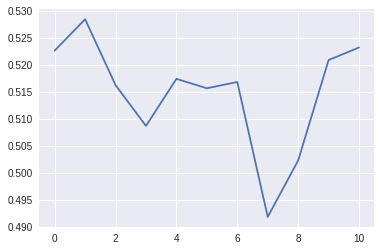

In [61]:
accs = []
for param in n_filterss:
  %time model = CNN_trainer(training_iter, num_train_steps, vocab_size, window_size, int(param), learning_rate, num_labels)
  accs.append(evaluate(model, dev_iter))

plt.plot(np.arange(0,11), accs)
best_n_filters = n_filterss[np.argmax(np.array(accs))]
print(best_n_filters)

In [62]:
model =  CNN_trainer(training_iter, num_train_steps, vocab_size,
                     window_size=14,
                     n_filters=2,
                     lr=10.0,
                     num_labels = num_labels)
evaluate(model, test_iter), evaluate(model, dev_iter)

(0.4963673350770125, 0.47732558139534886)